 **课程内容**：
 1. 学习掌握Pandas主要数据结构及用法，
 2. 理解数据IO，均值、方差、分位数、中位数、众数、偏度、峰度等概念及内涵，并在pandas框架上进行实现，
 3. 掌握Groupby、Apply等统计分析工具，
 **课程目标**：
 1. 学习pandas数据操作，解决作业中统计问题，加深pandas了解
  

# pandas

Pandas是一种高效的数据处理库，它以 dataframe(带标签的，大小可变的，二维表格)和series(带标签的一维数组)为基本数据类型，呈现出类似excel的二维数据

## series

Series结构它是一种类似于一维数组的结构，由一组数据值（value）和一组标签组成，其中标签与数据值之间是一一对应的关系。Series可以保存任何数据类型，比如整数、字符串、浮点数、Python 对象等，它的标签默认为整数，从0开始依次递增。Series 的结构图，如下所示：
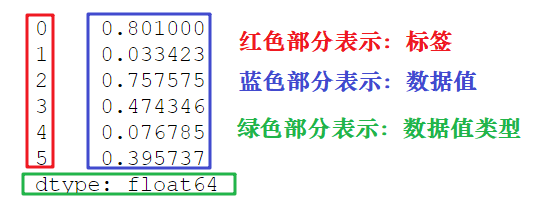

使用Series形式如下
```python
import pandas as pd
s=pd.Series( data, index, dtype, copy)
```

|参数名称	|描述|
|:--: |:--: |
|data	|输入的数据，可以是列表、常量、ndarray 数组等。|
|index|	索引值必须是惟一的，如果没有传递索引，则默认为 np.arrange(n)。|
|dtype|	dtype表示数据类型，如果没有提供，则会自动判断得出。|
|copy	|表示对 data 进行拷贝，默认为 False。|

In [1]:
import pandas as pd 
import numpy as np
# 你可以通过Series 的values和index属性获取其数组表示形式和索引对象
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)
# print(s.values,s.index)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [2]:
# 指定索引标签
s2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c']) 
print(s2)

d    4
b    7
a   -5
c    3
dtype: int64


In [3]:
# 通过字典创建Series对象
data = {'a' : 0., 'b' : 2., 'c' : 5.}
s = pd.Series(data)
print(s)
# 访问数据可以通过下标也可以通过标签
print(f"s[2]:{s[2]},s['c']:{s['c']}")

a    0.0
b    2.0
c    5.0
dtype: float64
s[2]:5.0,s['c']:5.0


## dataframe

DataFrame 是 Pandas 的重要数据结构之一,DataFrame 一个表格型的数据结构，既有行标签（index），又有列标签（columns），它也被称异构数据表，所谓异构，指的是表格中每列的数据类型可以不同，比如可以是字符串、整型或者浮点型等。其示意图如下所示:
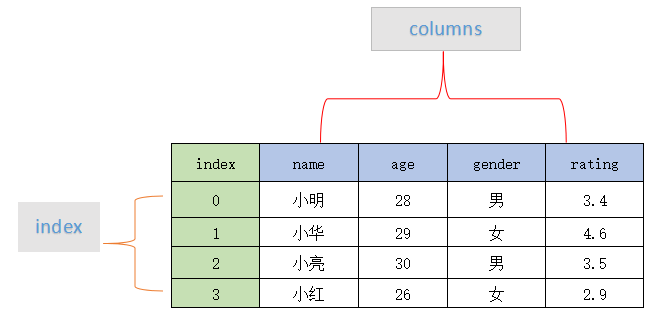

DataFrame 对象的语法格式如下:
```python
import pandas as pd
pd.DataFrame( data, index, columns, dtype, copy)
```
|参数名称	|说明|
|:--:  |:--: |
|data	|输入的数据，可以是 ndarray，series，list，dict，标量以及一个 DataFrame。|
|index	|行标签，如果没有传递 index 值，则默认行标签是 np.arange(n)，n 代表 data 的元素个数。|
|columns	|列标签，如果没有传递 columns 值，则默认列标签是 np.arange(n)。|
|dtype	|dtype表示每一列的数据类型。|
|copy	|默认为 False，表示复制数据 data。|

In [4]:
# 以字典的形式创建DataFrame 对象
df = pd.DataFrame({'name': ["小明","小华","小亮","小红"],
                   'age': [28,29,30,26],
                   'gender': ["男","女","男","女"],
                   'rating': [3.4,4.6,3.5,2.9],})
df

,name,age,gender,rating
0,小明,28,男,3.4
1,小华,29,女,4.6
2,小亮,30,男,3.5
3,小红,26,女,2.9


In [5]:
# 使用嵌套列表形式创建DataFrame 对象
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
df

,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


In [6]:
# data是多种数据类型
dates = pd.date_range('20130101', periods=4)
df = pd.DataFrame({'A': 1.,
                   'B': dates,
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})
df

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


在DataFrame中可以用[col_name]与[col_list]来取出相应的列与由多个列组成的表，结果分别为Series和DataFrame

In [7]:
df['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [8]:
df[['A', 'B', 'C']]

,A,B,C
0,1.0,2013-01-01,1.0
1,1.0,2013-01-02,1.0
2,1.0,2013-01-03,1.0
3,1.0,2013-01-04,1.0


## 常用基本函数

1. 获得数据索引、列名、数据
2. 查看数据形状、数据维度
3. 前几行或者后几行数据
4. 表的信息概况和表中数值列对应的主要统计量

In [9]:
print(df.index) # 查看索引
print(df.columns) # 查看列名
print(df.values)

Int64Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
[[1.0 Timestamp('2013-01-01 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-03 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-04 00:00:00') 1.0 3 'train' 'foo']]


In [10]:
df.dtypes # 查看每列数据类型

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
print(df.shape) # 数据形状
df.head() # 显示头几行，可以传入具体数值

(4, 6)


,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [12]:
df.tail() # 显示尾几行，可以传入具体数值

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [13]:
df.sort_index(axis=1, ascending=True) # 按轴排序["A","B","C","D","E","F"]

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [14]:
df.sort_values(by='B') # 按值排序

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-03,1.0,3,test,foo
3,1.0,2013-01-04,1.0,3,train,foo


In [15]:
df.info() # 用于查看表的信息概况

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 260.0+ bytes


In [16]:
df.describe() # 用于查看一些基本的统计详细信息，例如均值，标准差等或一系列数值

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


# 数据索引

很多时候需要从数据表中提取出相应的数据进行分析，python提供了索引操作符"[]",pandas的loc和iloc可以访问 Series 或者 DataFrame 中的数据，索引器的一般形式为loc[*, *]，其中第一个*代表行的选择，第二个*代表列的选择：<br />
loc:使用标签索引，它的取值前闭后闭,也就是包括边界值标签（开始和结束）<br />
iloc:使用整数索引,通过整数索引切片选择数据时，前闭后开(不包含边界结束值)

In [17]:
import pandas as pd
df = pd.DataFrame({'a': [47,66,48,77,16,91],
                   'b': [94,52,21,10,10,60],
                   'c': [43,48,75,70,58,22],
                   'd': [92,79,14,42,93,46],
                   'e': [67,94,29,23,43,50],
                   'f': [19,44,56,62,53,41]})
df

,a,b,c,d,e,f
0,47,94,43,92,67,19
1,66,52,48,79,94,44
2,48,21,75,14,29,56
3,77,10,70,42,23,62
4,16,10,58,93,43,53
5,91,60,22,46,50,41


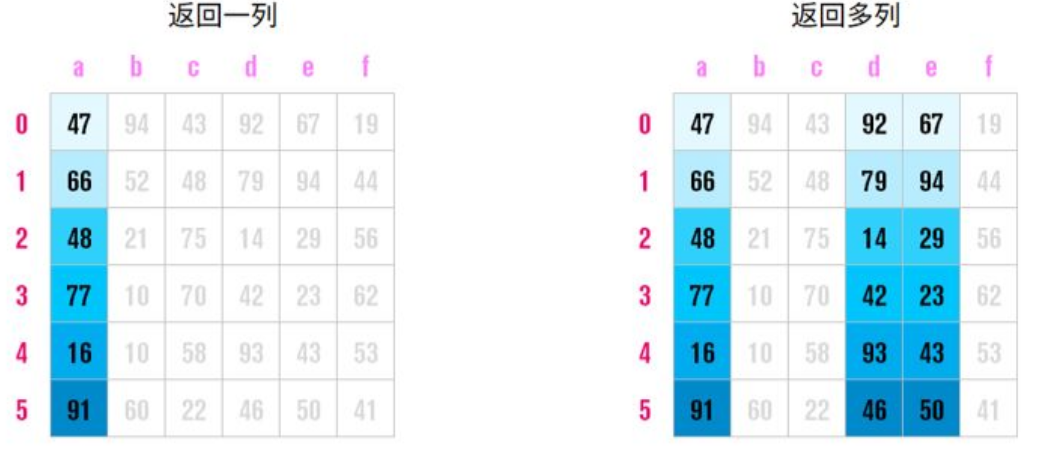

In [18]:
# 单列操作,获取某一列数据
print(df["a"]) # 用列名索引,以series格式返回
print(df.iloc[:,0]) # 返回第零列
print(df.a) # 等价于df["a"]，但当列名为DataFrame本身方法如df.info无法用这样的方式获取，不建议使用
print(df[['a']]) # # 用列名索引,以DataFrame格式返回,因此可以获取多列
print(df[['a','b']])

0    47
1    66
2    48
3    77
4    16
5    91
Name: a, dtype: int64
0    47
1    66
2    48
3    77
4    16
5    91
Name: a, dtype: int64
0    47
1    66
2    48
3    77
4    16
5    91
Name: a, dtype: int64
    a
0  47
1  66
2  48
3  77
4  16
5  91
    a   b
0  47  94
1  66  52
2  48  21
3  77  10
4  16  10
5  91  60


In [19]:
# 多列操作，获取多列数据
print(df.iloc[:,[0,3,4]])# 0，2，4列对应的所有行
print(df[['a','d','e']])# ade对应的所有行
print(df.loc[:,['a','d','e']]) # ade对应的所有行
print(df.iloc[1:4,0:5:2]) # 去第1到4行，对应的0-5列的奇数列

    a   d   e
0  47  92  67
1  66  79  94
2  48  14  29
3  77  42  23
4  16  93  43
5  91  46  50
    a   d   e
0  47  92  67
1  66  79  94
2  48  14  29
3  77  42  23
4  16  93  43
5  91  46  50
    a   d   e
0  47  92  67
1  66  79  94
2  48  14  29
3  77  42  23
4  16  93  43
5  91  46  50
    a   c   e
1  66  48  94
2  48  75  29
3  77  70  23


In [20]:
# 行操作和列操作基本相同
print(df[1:3]) # 用行索引
print(df.loc[1:4])
print(df.iloc[-3:]) # 取最后三行

    a   b   c   d   e   f
1  66  52  48  79  94  44
2  48  21  75  14  29  56
    a   b   c   d   e   f
1  66  52  48  79  94  44
2  48  21  75  14  29  56
3  77  10  70  42  23  62
4  16  10  58  93  43  53
    a   b   c   d   e   f
3  77  10  70  42  23  62
4  16  10  58  93  43  53
5  91  60  22  46  50  41


条件索引：在索引值时有时我们并不知道数据对应的行和列，而是希望搜索出某一列满足要求对应的行，如：我们希望取上方数据中第a列大于50对应所有行。
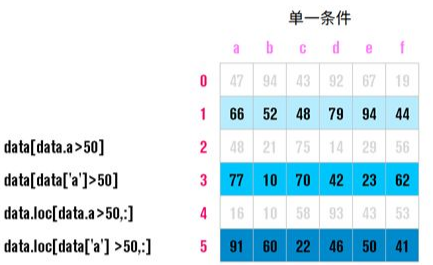

In [21]:
df[df.a > 50] # 根据条件塞选满足条件的行

,a,b,c,d,e,f
1,66,52,48,79,94,44
3,77,10,70,42,23,62
5,91,60,22,46,50,41


In [22]:
df[df['a'].isin([66,77,91])] # isin()筛选满足条件的值

,a,b,c,d,e,f
1,66,52,48,79,94,44
3,77,10,70,42,23,62
5,91,60,22,46,50,41


搜索时我们还可以选出满足要求数据的指定列数据
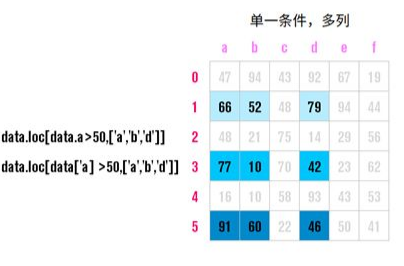

In [23]:
df.loc[df.a > 50,['a','b','d']] # 筛选满足条件的某些列

,a,b,d
1,66,52,79
3,77,10,42
5,91,60,46


##  删除数据

当数据处理后我们希望丢弃到部分不在需要的行列数据，pandas提供了drop方法

In [24]:
df.drop(['a','d'], axis=1) # 按照列名进行删除

,b,c,e,f
0,94,43,67,19
1,52,48,94,44
2,21,75,29,56
3,10,70,23,62
4,10,58,43,53
5,60,22,50,41


In [25]:
df.drop(df.index[[1, 3, 5]]) # 删除行

,a,b,c,d,e,f
0,47,94,43,92,67,19
2,48,21,75,14,29,56
4,16,10,58,93,43,53


In [26]:
df[~(df['b'] == 10)] # 按照某一列的值取反

,a,b,c,d,e,f
0,47,94,43,92,67,19
1,66,52,48,79,94,44
2,48,21,75,14,29,56
5,91,60,22,46,50,41


## 数据预处理

有时数据的多个属性并不保存在同一个文件中，而是将不同数据的数据分别存放在不同的文件中，为方便后续处理，我们希望合并数据，pandas提供了merge和concat等方法合并数据<br />
concat:两个或多个df间行方向或列方向进行内联或外联拼接操作<br />
merge:可用于两个df间行方向或列方向的拼接操作，默认列拼接，取交集（即：存在相同主键的df1和df2的列拼接）

In [28]:
df1 = pd.DataFrame({'id': [3,2,1],
                   'b': [94,52,21],
                   'c': [43,48,75],})
df2 = pd.DataFrame({'id': [1,2,3],
                   'd': ["GD","GX","HN"]})

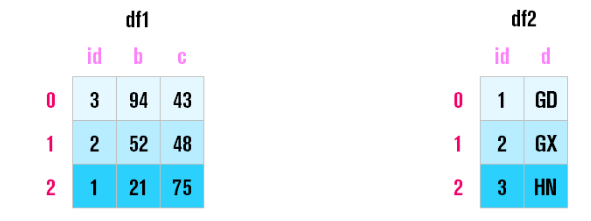

In [30]:
# concat拼接有两种方式inner(交集)，outer(并集)
pd.concat([df1,df2], axis=1,join='inner') # 普通的堆叠操作，横向和纵向

,id,b,c,id,d
0,3,94,43,1,GD
1,2,52,48,2,GX
2,1,21,75,3,HN


In [31]:
pd.concat([df1,df2], axis=0, join='outer')  # 在行方向进行拼接，没有的数据使用NaN填充

,id,b,c,d
0,3,94.0,43.0,NaN
1,2,52.0,48.0,NaN
2,1,21.0,75.0,NaN
0,1,NaN,NaN,GD
1,2,NaN,NaN,GX
2,3,NaN,NaN,HN


有时我们希望有相同的id可以按照id的方式来拼接对应的属性，类似excel中的vlookup，concat不能满足对应的要求，可以使用merge进行合并

In [32]:
pd.merge(df3,df4,on='id')  # 注意按照索引拼接，通过一个或多个键连接在一起

,id,b,c,d
0,3,94,43,HN
1,2,52,48,GX
2,1,21,75,GD


如果想去除重复行，可以使用drop_duplicates。其中的关键参数是keep，默认值first表示每个组合保留第一次出现的所在行，last表示保留最后一次出现的所在行，False表示把所有重复组合所在的行剔除。

In [41]:
df = pd.DataFrame({
    "id": [1,2,2,3],
    "value": [1,2,2,3]
})

In [42]:
df

,id,value
0,1,1
1,2,2
2,2,2
3,3,3


In [43]:
df.drop_duplicates(keep='first') # 检测处理重复值 

,id,value
0,1,1
1,2,2
3,3,3


In [44]:
df.drop_duplicates(keep='last')

,id,value
0,1,1
2,2,2
3,3,3


## 缺失值

从上方合并可以看出，当两个pd维度不完全相同是，合并会产生NaN值(表示未定义或不可表示的值)

In [45]:
# pd.concat()# 堆叠
df1 = pd.DataFrame(np.random.randint(10,20,size=(4, 6)),columns=['a','b','c','d','e','f'])
# 当两列数据不能完全拼接上时，pandas会使用NaN值填充没有值的列
df2 = pd.DataFrame(np.random.randint(10,20,size=(3, 5)),columns=['a','b','c','d','e'])
df2 = pd.concat([df1,df2]) # 
df2

,a,b,c,d,e,f
0,13,16,19,17,14,15.0
1,13,19,12,19,16,11.0
2,16,15,16,15,16,12.0
3,12,11,11,16,17,17.0
0,13,11,16,15,14,NaN
1,18,17,16,11,19,NaN
2,10,16,17,16,15,NaN


In [46]:
df2.iloc[3,:] = np.nan

In [47]:
# 可以指定丢弃方式any(有NaN就丢弃),all对应行或列（所有值均为NaN丢弃）可以通过axis指定行还是列丢弃
df2.dropna(how='all') 

,a,b,c,d,e,f
0,13.0,16.0,19.0,17.0,14.0,15.0
1,13.0,19.0,12.0,19.0,16.0,11.0
2,16.0,15.0,16.0,15.0,16.0,12.0
0,13.0,11.0,16.0,15.0,14.0,NaN
1,18.0,17.0,16.0,11.0,19.0,NaN
2,10.0,16.0,17.0,16.0,15.0,NaN


In [48]:
df2.dropna(how='any')

,a,b,c,d,e,f
0,13.0,16.0,19.0,17.0,14.0,15.0
1,13.0,19.0,12.0,19.0,16.0,11.0
2,16.0,15.0,16.0,15.0,16.0,12.0


In [49]:
df2.fillna(value=5) # 使用具体值填充

,a,b,c,d,e,f
0,13.0,16.0,19.0,17.0,14.0,15.0
1,13.0,19.0,12.0,19.0,16.0,11.0
2,16.0,15.0,16.0,15.0,16.0,12.0
3,5.0,5.0,5.0,5.0,5.0,5.0
0,13.0,11.0,16.0,15.0,14.0,5.0
1,18.0,17.0,16.0,11.0,19.0,5.0
2,10.0,16.0,17.0,16.0,15.0,5.0


In [50]:
# ffill表示用列表后上一列对应位置的值进行填充，backfill表示用后一个值来填充，
df2.fillna(method = 'ffill', axis = 0)

,a,b,c,d,e,f
0,13.0,16.0,19.0,17.0,14.0,15.0
1,13.0,19.0,12.0,19.0,16.0,11.0
2,16.0,15.0,16.0,15.0,16.0,12.0
3,16.0,15.0,16.0,15.0,16.0,12.0
0,13.0,11.0,16.0,15.0,14.0,12.0
1,18.0,17.0,16.0,11.0,19.0,12.0
2,10.0,16.0,17.0,16.0,15.0,12.0


# 常用的统计方法

df.describe() # 查看数据的统计摘要<br />
当我们获得索引后的数据时，我们希望获得数据的一些信息，如对应特征的数值均值，标准差，以及最值特性时，pandas提供了一系列基础的统计方法，由于操作后返回的是标量，所以又称为聚合函数，它们有一个公共参数axis，默认为0代表逐列聚合，如果设置为1则表示逐行聚合。

|函数|描述|
|:--:|:--:|
|count|统计非空值数量|
|sum，mean,std，var|和，平均值,标准差，方差|
|median，abs，prod|算数中位数，绝对值，乘积|
|unique, nunique,value_counts| 唯一值列表，唯一值个数,唯一值和对应频数|
|max，min|最大值，最小值|
|skew|样本偏度 (第三阶)|
|kurt|样本峰度 (第四阶)|
|cumsum，cumprod|累加，累乘|
|cummax，cummin|累积最大值，累积最小值|

In [57]:
## 案例

df.mean()

id       2.0
value    2.0
dtype: float64

In [58]:
## 案例

df['value'].cumsum()

0    1
1    3
2    5
3    8
Name: value, dtype: int64

偏度是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度，<br />
（1）Skewness = 0 ，分布形态与正态分布偏度相同。<br />
（2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。<br />
（3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。<br />
（4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。<br />
计算公式为：
$$Skewness=E[((x-E(x))/(\sqrt{D(x)}))^3]$$

Definition:峰度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度。<br />
峰度是四阶标准矩计算出来的。<br />
（1）Kurtosis=0 与正态分布的陡缓程度相同。<br />
（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰<br />
（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰<br />
计算公式：<br />
$$Kurtosis=E[ ( (x-E(x))/ (\sqrt(D(x))) )^4 ]-3$$

In [65]:
df = pd.DataFrame({"id": np.arange(10), "value": np.logspace(1, 10, 10, base=2), "weight": np.linspace(1,10,10)})

In [66]:
df.value.skew()

2.0900066860361113

In [67]:
df.value.kurt() #峰度

4.268069943716147

在做数据分析时，我们有时候会去计算不同属性之间的相关系数，DataFrame的corr方法将以DataFrame的形式分别返回完整的相关系数，相关系数 r 是一个介于 -1 和 1 之间的无单位的值，r 越接近 0，线性关系越弱，正的 r 值表示正相关，在这种情况下，两个变量的值往往一起增加，负的 r 值表示负相关，在这种情况下，当一个变量的值增加时，另一个变量的值往往会减少。<br />
DataFrame的方法cov方法获得样本的协方差矩阵，协方差矩阵可视作方差和协方差两部分组成，即方差构成了对角线上的元素，协方差构成了非对角线上的元素。

In [68]:
df[['value', 'weight']].corr()

,value,weight
value,1.000000,0.798837
weight,0.798837,1.000000


In [69]:
df[['value', 'weight']].cov()

,value,weight
value,108832.044444,797.888889
weight,797.888889,9.166667


# map

许多数据集，保存的属性可能是字符串，在样本计算时并不方便，你可能希望根据数组、Series或DataFrame列中的值来实现转换工作，map函数可以实现对应的功能，map()函数用于Series对象或DataFrame对象的一列，接收函数作为或字典对象作为参数，返回经过函数或字典映射处理后的值。

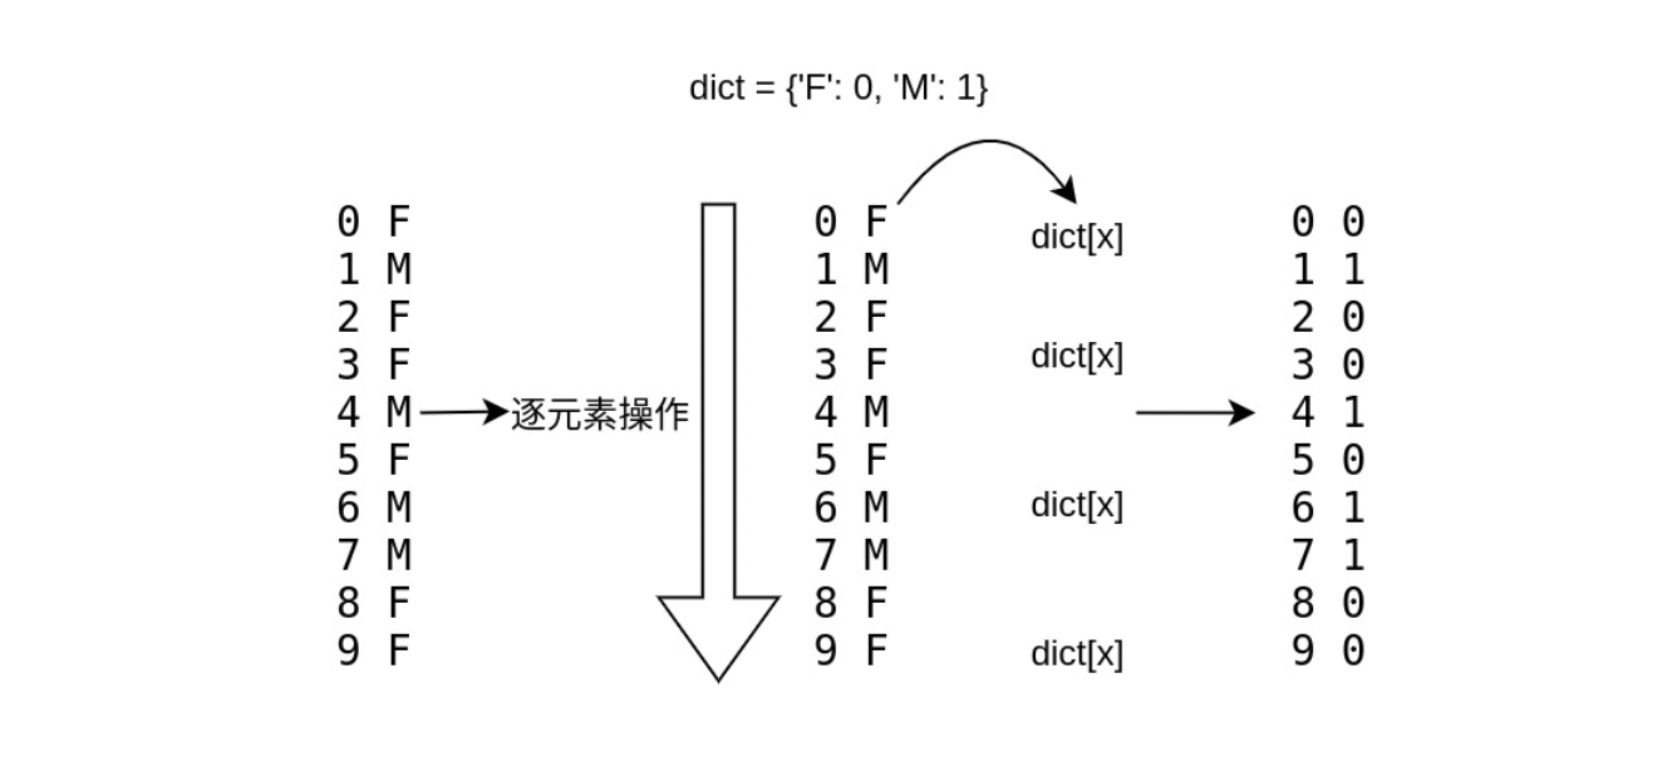

In [70]:
# 我们编写F、M与0、1之间一一映射的字典
df=pd.DataFrame({
    "name":['Jack', 'Alice', 'Lily', 'Mshis', 'Gdli', 'Agosh', 'Filu', 'Mack', 'Lucy', 'Pony'],
    "gender":['F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F'],
    "age":np.random.randint(15,50,10),
    "salary":np.random.randint(5,50,10),
    })
gendermap = {'F': 0, 'M': 1}
df["gender"] = df["gender"].map(gendermap)
df

,name,gender,age,salary
0,Jack,0,20,45
1,Alice,1,16,15
2,Lily,0,23,29
3,Mshis,0,24,45
4,Gdli,1,24,28
5,Agosh,0,37,41
6,Filu,1,24,22
7,Mack,1,23,15
8,Lucy,0,21,26
9,Pony,0,17,40


In [71]:
#注意这里传入的是函数名，不带括号
def gender_map(x):
    gender = "M" if x == 1 else "F"
    return gender
df["gender"] = df["gender"].map(gender_map)
df

,name,gender,age,salary
0,Jack,F,20,45
1,Alice,M,16,15
2,Lily,F,23,29
3,Mshis,F,24,45
4,Gdli,M,24,28
5,Agosh,F,37,41
6,Filu,M,24,22
7,Mack,M,23,15
8,Lucy,F,21,26
9,Pony,F,17,40


# apply方法

apply() 函数功能也是自动遍历整个 Series 或者 DataFrame, 对每一个元素运行指定的函数。和map、transformer进行某列处理不能利用相互的列值组合处理不同的是，apply()语句可以对单列或多列进行运算，覆盖更多的使用场景

In [81]:
# 也可以是匿名函数对应的x表示df表中逐个传入的序列[]
df[['age', 'salary']].apply(lambda x: x*2) # lambda

,age,salary
0,40,90
1,32,30
2,46,58
3,48,90
4,48,56
5,74,82
6,48,44
7,46,30
8,42,52
9,34,80


In [82]:
# apply传入的函数可以是python内置函数实现
df[['age', 'salary']].apply(max)

age       37
salary    45
dtype: int64

In [83]:
df[['age', 'salary']].apply(np.mean) # numpy 等其他库的函数 ufunc

age       22.9
salary    30.6
dtype: float64

In [88]:
df=pd.DataFrame({
    "name":['Jack', 'Alice', 'Lily', 'Mshis', 'Gdli', 'Agosh', 'Filu', 'Mack', 'Lucy', 'Pony'],
    "gender":['F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F'],
    "age":np.random.randint(15,50,10),
    "salary":np.random.randint(5,50,10),
    })
# 应用函数，组合多列信息
def apply_func(name,gender,age):
    age = str(age)
    gender = '女性' if gender == 'F' else '男性'
    return f"用户{name}，性别{gender}，年龄{age}岁"
df["all"] = df.apply(lambda row:apply_func(row['name'],row['gender'],row['age']),axis=1)
df

,name,gender,age,salary,all
0,Jack,F,19,30,用户Jack，性别女性，年龄19岁
1,Alice,M,24,14,用户Alice，性别男性，年龄24岁
2,Lily,F,23,42,用户Lily，性别女性，年龄23岁
3,Mshis,F,19,13,用户Mshis，性别女性，年龄19岁
4,Gdli,M,15,12,用户Gdli，性别男性，年龄15岁
5,Agosh,F,36,10,用户Agosh，性别女性，年龄36岁
6,Filu,M,19,39,用户Filu，性别男性，年龄19岁
7,Mack,M,22,44,用户Mack，性别男性，年龄22岁
8,Lucy,F,48,13,用户Lucy，性别女性，年龄48岁
9,Pony,F,25,31,用户Pony，性别女性，年龄25岁


# groupy分组

在数据分析中，经常需要将数据根据某个（多个）字段划分为不同的群体（group）进行分析,如上面的df我们希望以性别划分，分析年龄和薪水差异时，我们可以看出分组需要明确分组依据、分组数据、以及对应操作和结果。在pandas中对数据框进行分组使用到groupby()方法,分组代码的一般格式为.
```python
df.groupby(分组依据)[数据来源].使用操作
```
其中主要使用到的参数为by，这个参数用于传入分组依据的变量名称，当变量为1个时传入名称字符串即可。当为多个时传入这些变量名称列表，DataFrame对象通过groupby()之后返回一个生成器，需要将其列表化才能得到需要的分组后的子组

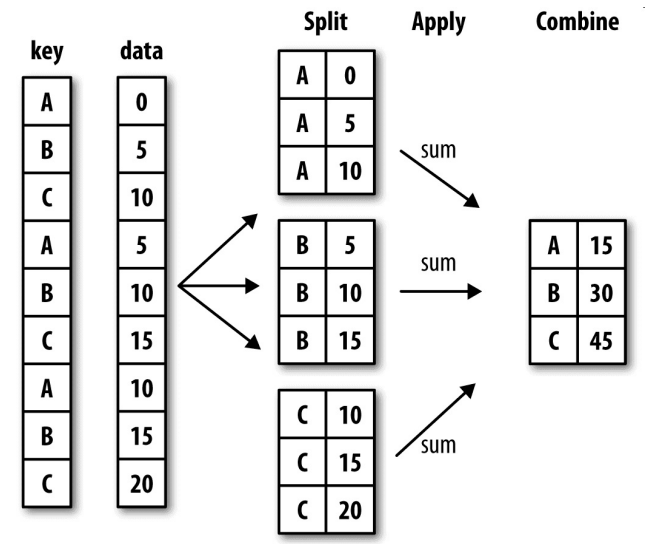

In [89]:
dfg=pd.DataFrame({
    "key":['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    "data":[0,5,10,5,10,15,10,15,20],
    })
#划分成组后求对应组的和结果
dfg.groupby(by='key').sum()

,data
key,
A,15
B,30
C,45


In [91]:
import numpy as np

dfc=pd.DataFrame({
    "name":['Jack', 'Alice', 'Lily', 'Mshis', 'Gdli', 'Agosh', 'Filu', 'Mack', 'Lucy', 'Pony'],
    "gender":['F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F'],
    "age":np.random.randint(25,28,10),
    "salary":np.random.randint(5,50,10),
    })

In [92]:
# groupby查传入的可以时多个属性
dfc.groupby(by=['gender','age']).sum()

salary
gender age        
F      25       26
       26       44
       27      116
M      25       32
       26       35
       27       40

在groupby后进行聚合计算时候，可以结合apply方法定义复杂聚合计算逻辑，例如:

In [94]:
# 返回每个分组的年龄均值+3
dfc.groupby(by=['gender','age']).apply(lambda sub_group: sub_group['salary'].sum() + 3)

gender  age
F       25      29
        26      47
        27     119
M       25      35
        26      38
        27      43
dtype: int64

## transform

通过groupby + apply 可以实现分组聚合统计，但分组统计结果是存储在每个组别上的，如果我们需要映射到原数据，还需要进行merge操作，比较麻烦，这时我们可以采用transform函数，直接得到与原数据结构一致的分组统计结果；
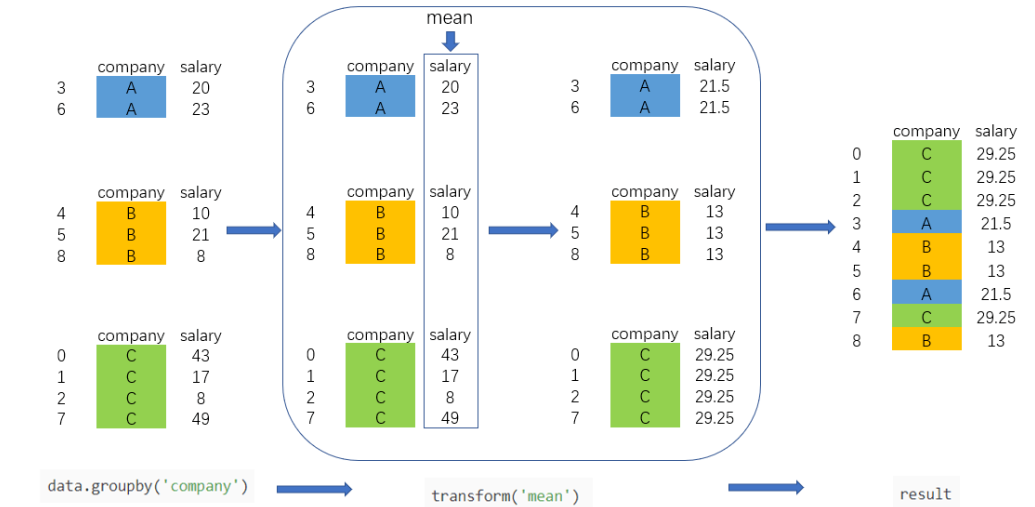

In [95]:
df=pd.DataFrame({
    "company":['C', 'C', 'C', 'A', 'B', 'B', 'A', 'C', 'B'],
    "gender":['F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
    "age":np.random.randint(15,50,9),
    "salary":np.random.randint(5,50,9),
    })
gendermap = {'F': 0, 'M': 1}
df["gender"] = df["gender"].map(gendermap)
df

,company,gender,age,salary
0,C,0,35,8
1,C,1,40,47
2,C,0,17,8
3,A,0,49,44
4,B,1,48,40
5,B,0,48,33
6,A,1,41,30
7,C,1,34,41
8,B,0,35,12


In [100]:
# 采用apply

df.groupby('company')['salary'].apply(np.mean)

company
A    37.000000
B    28.333333
C    26.000000
Name: salary, dtype: float64

In [102]:
# 采用transform

df.groupby('company')['salary'].transform(np.mean)

#可以看出transform依然计算了每个company下的薪酬均值，并且返回的格式与原数据一致

0    26.000000
1    26.000000
2    26.000000
3    37.000000
4    28.333333
5    28.333333
6    37.000000
7    26.000000
8    28.333333
Name: salary, dtype: float64

In [103]:
df['avg_salary'] = df.groupby('company')['salary'].transform('mean')
df

,company,gender,age,salary,avg_salary
0,C,0,35,8,26.000000
1,C,1,40,47,26.000000
2,C,0,17,8,26.000000
3,A,0,49,44,37.000000
4,B,1,48,40,28.333333
5,B,0,48,33,28.333333
6,A,1,41,30,37.000000
7,C,1,34,41,26.000000
8,B,0,35,12,28.333333


In [105]:
# 当我们需要计算每个员工薪水对应公司平均均值差时可以通过transform调用自定义的函数实现
df['salary_minus_avg'] = df.groupby('company')['salary'].transform(lambda x: x-x.mean())

In [108]:
df

# 计算结果符合预期

,company,gender,age,salary,avg_salary,salary_minus_avg
0,C,0,35,8,26.000000,-18.000000
1,C,1,40,47,26.000000,21.000000
2,C,0,17,8,26.000000,-18.000000
3,A,0,49,44,37.000000,7.000000
4,B,1,48,40,28.333333,11.666667
5,B,0,48,33,28.333333,4.666667
6,A,1,41,30,37.000000,-7.000000
7,C,1,34,41,26.000000,15.000000
8,B,0,35,12,28.333333,-16.333333


## groupby + apply

groupby后的apply，以分组后的子DataFrame作为参数传入指定函数的，基本操作单位是DataFrame。

In [109]:
# 如上述问题，当我们将员工按公司分组后，我们希望按照薪水对数据进行排序时，可以应用apply函数
def group_staff_salary(x):
    df1 = x.sort_values(by = 'salary',ascending=True)
    return df1
df.groupby('company',as_index=False).apply(group_staff_salary)

company  gender  age  salary  avg_salary  salary_minus_avg
0 6       A       1   41      30   37.000000         -7.000000
  3       A       0   49      44   37.000000          7.000000
1 8       B       0   35      12   28.333333        -16.333333
  5       B       0   48      33   28.333333          4.666667
  4       B       1   48      40   28.333333         11.666667
2 0       C       0   35       8   26.000000        -18.000000
  2       C       0   17       8   26.000000        -18.000000
  7       C       1   34      41   26.000000         15.000000
  1       C       1   40      47   26.000000         21.000000

或当我们希望只看每个公司薪水最高的人时，我们可以应用apply函数对分组后的DataFrame进行处理
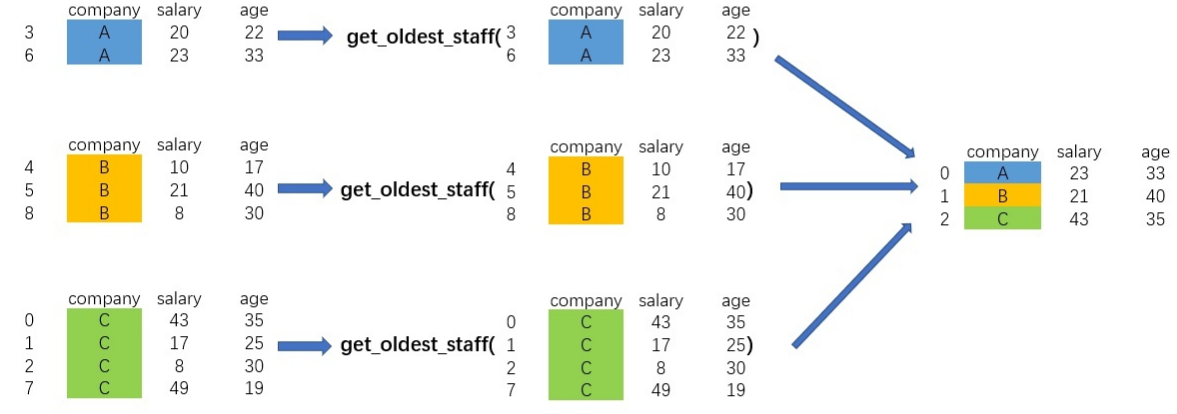

In [110]:
def group_staff_salary(x):
    df1 = x.sort_values(by = 'salary',ascending=True)
    return df1.iloc[-1,:]
df.groupby('company',as_index=False).apply(group_staff_salary)

,company,gender,age,salary,avg_salary,salary_minus_avg
0,A,0,49,44,37.000000,7.000000
1,B,1,48,40,28.333333,11.666667
2,C,1,40,47,26.000000,21.000000


## agg
聚合操作是groupby后非常常见的操作,因直接使用groupby仍有许多不方便。如（无法同时使用多个函数，无法对特定的列使用特定的聚合）等，通过agg可以让分组后的聚合功能更适用。

当使用agg()对不同列使用不同的操作时可以使用字典传参键为变量名，值为对应的聚合函数字符串，形如{'v1':['sum','mean'], 'v2':['median','max','min]}就代表对数据框中的v1列进行求和、均值操作，对v2列进行中位数、最大值、最小值操作

In [111]:
df

,company,gender,age,salary,avg_salary,salary_minus_avg
0,C,0,35,8,26.000000,-18.000000
1,C,1,40,47,26.000000,21.000000
2,C,0,17,8,26.000000,-18.000000
3,A,0,49,44,37.000000,7.000000
4,B,1,48,40,28.333333,11.666667
5,B,0,48,33,28.333333,4.666667
6,A,1,41,30,37.000000,-7.000000
7,C,1,34,41,26.000000,15.000000
8,B,0,35,12,28.333333,-16.333333


In [112]:
# 当使用多个聚合函数时，需要用列表的形式把内置聚合函数对应的字符串传入
df.agg({'age': ['max','min'], 'salary': ['mean','std']})

,age,salary
max,49.0,NaN
mean,NaN,29.222222
min,17.0,NaN
std,NaN,15.817536


In [113]:
df.groupby("gender").agg('max')

,company,age,salary,avg_salary,salary_minus_avg
gender,,,,,
0,C,49,44,37.0,7.0
1,C,48,47,37.0,21.0


In [114]:
dfc.groupby("gender").agg(['min','max','median'])

age            salary           
       min max median    min max median
gender                                 
F       25  27     27     13  47   30.0
M       25  27     26     10  40   28.5

In [115]:
# 可以使用具体的自定义函数,传入为数据源中列，逐列进行计算
df.groupby('company').agg(lambda x: x.mean()-x.min())

,gender,age,salary,avg_salary,salary_minus_avg
company,,,,,
A,0.500000,4.000000,7.000000,0.0,7.000000
B,0.333333,8.666667,16.333333,0.0,16.333333
C,0.500000,14.500000,18.000000,0.0,18.000000


In [116]:
# 针对不同列使用不同的聚合方法
df.groupby('company').agg({'salary':'median','age':'mean'})

,salary,age
company,,
A,37.0,45.000000
B,33.0,43.666667
C,24.5,31.500000


In [117]:
df.groupby(['age','gender']).agg({'salary':['min','max','median']}).reset_index(drop=False)

age gender salary           
                min max median
0  17      0      8   8      8
1  34      1     41  41     41
2  35      0      8  12     10
3  40      1     47  47     47
4  41      1     30  30     30
5  48      0     33  33     33
6  48      1     40  40     40
7  49      0     44  44     44

# 数据输入 / 输出csv,excel

数据往往会存储在文件中，方便后续操作，pandas可以读取的文件格式有很多，这里主要介绍读取csv, excel文件。

In [118]:
df

,company,gender,age,salary,avg_salary,salary_minus_avg
0,C,0,35,8,26.000000,-18.000000
1,C,1,40,47,26.000000,21.000000
2,C,0,17,8,26.000000,-18.000000
3,A,0,49,44,37.000000,7.000000
4,B,1,48,40,28.333333,11.666667
5,B,0,48,33,28.333333,4.666667
6,A,1,41,30,37.000000,-7.000000
7,C,1,34,41,26.000000,15.000000
8,B,0,35,12,28.333333,-16.333333


如果我们希望将上述数据保存到当前目录test.csv文件中,可以使用to_csv方法将数据写入到指定路径的文件中，一般在数据写入中，最常用的操作是把index设置为False，特别当索引没有特殊意义的时候，这样的行为能把索引在保存的时候去除。

In [120]:
df.to_csv('./test.csv',index=False)
df.to_excel('./test.xlsx',index=False)

In [125]:
# 读取csv数据
pd.read_csv('./test.csv')

,company,gender,age,salary,avg_salary,salary_minus_avg
0,C,0,35,8,26.000000,-18.000000
1,C,1,40,47,26.000000,21.000000
2,C,0,17,8,26.000000,-18.000000
3,A,0,49,44,37.000000,7.000000
4,B,1,48,40,28.333333,11.666667
5,B,0,48,33,28.333333,4.666667
6,A,1,41,30,37.000000,-7.000000
7,C,1,34,41,26.000000,15.000000
8,B,0,35,12,28.333333,-16.333333


In [126]:
# 读取excel格式数据
pd.read_excel('./test.xlsx')

,company,gender,age,salary,avg_salary,salary_minus_avg
0,C,0,35,8,26.000000,-18.000000
1,C,1,40,47,26.000000,21.000000
2,C,0,17,8,26.000000,-18.000000
3,A,0,49,44,37.000000,7.000000
4,B,1,48,40,28.333333,11.666667
5,B,0,48,33,28.333333,4.666667
6,A,1,41,30,37.000000,-7.000000
7,C,1,34,41,26.000000,15.000000
8,B,0,35,12,28.333333,-16.333333


# 代码实践

1.一个全数值DatraFrame，每个数字减去该行的平均数，df = pd.DataFrame(np.random.random(size=(4, 6)))

In [128]:
df = pd.DataFrame(np.random.random(size=(4, 6)))











######### 做完查看答案 ############
# df.apply(lambda x:x-x.mean(),axis=1)

2. 获取每个公司薪资最多的人，按薪资从高到低排序

In [129]:
df=pd.DataFrame({
"company":['C', 'C', 'C', 'A', 'B', 'B', 'A', 'C', 'B'],
"gender":['F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
"age":np.random.randint(15,50,9),
"salary":np.random.randint(5,100,9),
})












############### 做完查看答案 #################
# def group_staff_salary(x):
#     df1 = x.sort_values(by = 'salary',ascending=True)
#     return df1.iloc[-1,:]
# df.groupby('company',as_index=False).apply(group_staff_salary).sort_values("salary")

3.按国家进行分组，对HP进行组内的归一化$\frac{x-x_{min}}{x_{max} - x_{min}}$

In [131]:
df = pd.DataFrame({'Brand': {0: 'Eagle Summit 4',
1: 'Ford Escort 4',
2: 'Ford Festiva 4',
3: 'Honda Civic 4',
4: 'Mazda Protege 4'},
'Price': {0: 8895, 1: 7402, 2: 6319, 3: 6635, 4: 6599},
'Country': {0: 'USA', 1: 'USA', 2: 'Japan', 3: 'Japan', 4: 'Japan'},
'Reliability': {0: 4.0, 1: 2.0, 2: 4.0, 3: 5.0, 4: 5.0},
'Mileage': {0: 33, 1: 36, 2: 37, 3: 32, 4: 32},
'Type': {0: 'Small', 1: 'Small', 2: 'Small', 3: 'Small', 4: 'Small'},
'Weight': {0: 2560, 1: 2345, 2: 1845, 3: 2260, 4: 2440},
'Disp.': {0: 97, 1: 114, 2: 81, 3: 91, 4: 113},
'HP': {0: 113, 1: 90, 2: 63, 3: 92, 4: 103}})

















############### 做完查看答案 #################
# def normalize(s):
#     s_min, s_max = s.min(), s.max()
#     res = (s - s_min)/(s_max - s_min)
#     return res
# df.groupby('Country').transform(normalize).head()